# Pandas Data Cleaning - Cumulative Lab

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Practice opening and inspecting the contents of CSVs using pandas dataframes
- Practice identifying and handling missing values
- Practice identifying and handling invalid values
- Practice cleaning text data by removing whitespace and fixing typos
- Practice joining multiple dataframes

## Your Task: Clean the Superheroes Dataset with Pandas

![LEGO superheroes](images/lego_superheroes.jpg)

Photo by <a href="https://unsplash.com/@yuliamatvienko?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Yulia Matvienko</a> on <a href="/s/photos/superhero?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Data Understanding
In this lab, we'll work with a version of the comprehensive Superheroes Dataset, which can be found on [Kaggle](https://www.kaggle.com/claudiodavi/superhero-set/data) and was originally scraped from [SuperHeroDb](https://www.superherodb.com/). We have modified the structure and contents of the dataset somewhat for the purposes of this lab.  Note that this data was collected in June 2017, so it may not reflect the most up-to-date superhero lore.

The data is contained in two separate CSV files:

1. `heroes_information.csv`: each record represents a superhero, with attributes of that superhero (e.g. eye color). Height is measured in centimeters, and weight is measured in pounds.
2. `super_hero_powers.csv`: each record represents a superpower, then has True/False values representing whether each superhero has that power

### Business Understanding

The business questions you have been provided are:

1. What is the distribution of superheroes by publisher?
2. What is the relationship between height and number of superpowers? And does this differ based on gender?
3. What are the 5 most common superpowers in Marvel Comics vs. DC Comics?

This lab also simulates something you are likely to encounter at some point or another in your career in data science: someone has given you access to a dataset, as well as a few questions, and has told you to "find something interesting".

So, in addition to completing the basic data cleaning tasks and the aggregation and reshaping tasks needed to answer the provided questions, you will also need to formulate a question of your own and perform any additional cleaning/aggregation/reshaping that is needed to answer it.

### Requirements

#### 1. Load the Data with Pandas

Create a dataframes `heroes_df` and `powers_df` that represent the two CSV files. Use pandas methods to inspect the shape and other attributes of these dataframes.

#### 2. Perform Data Cleaning Required to Answer First Question

The first question is: *What is the distribution of superheroes by publisher?*

In order to answer this question, you will need to:

* Identify and handle missing values
* Identify and handle text data requiring cleaning

#### 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

The second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

In order to answer this question, you will need to:

* Join the dataframes together
* Identify and handle invalid values

#### 4. Perform Data Aggregation Required to Answer Third Question

The third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

This should not require any additional data cleaning or joining of tables, but it will require some additional aggregation.

#### 5. Formulate and Answer Your Own Question

This part is fairly open-ended. Think of a question that can be answered with the available data, and perform any cleaning or aggregation required to answer that question.

## 1. Load the Data with Pandas

In the cell below, we:

* Import and alias `pandas` as `pd`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [158]:
# Run this cell without changes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Superheroes

In the cell below, load `heroes_information.csv` as `heroes_df`:

In [159]:
heroes_df = pd.read_csv('heroes_information.csv')

heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks like that CSV came with an index column, resulting in an extra column called `Unnamed: 0`. We don't need that column, so write code to get rid of it below.

There are two ways to do this:

1. Re-load with `read_csv`, and specify the parameter `index_col=0`
2. Drop the column `Unnamed: 0` with `axis=1`

In [160]:
heroes_df = pd.read_csv('heroes_information.csv', index_col = 0)

heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


The following code checks that the dataframe was loaded correctly.

In [161]:
# Run this cell without changes

# There should be 734 rows
assert heroes_df.shape[0] == 734

# There should be 10 columns. If this fails, make sure you got rid of
# the extra index column
assert heroes_df.shape[1] == 10

# These should be the columns
assert list(heroes_df.columns) == ['name', 'Gender', 'Eye color', 'Race',
 'Hair color', 'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight']

Now you want to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, inspect the overall shape of the dataframe:

In [162]:
heroes_df.shape

(734, 10)

Now let's look at the info printout:

In [163]:
# Run this cell without changes
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In the cell below, interpret that information. Do the data types line up with what we expect? Are there any missing values?

In [ ]:
# Replace None with appropriate text
"""
Some of the columns have null values. We would guess that besides weight and height, the other columns would be strings rather than objects.
"""

### Superpowers

Now, repeat the same process with `super_hero_powers.csv`. Name the dataframe `powers_df`. This time, make sure you use `index_col=0` when opening the CSV because the index contains important information.

In [164]:
powers_df = pd.read_csv('super_hero_powers.csv', index_col = 0)
powers_df

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,Agent Zero,Air-Walker,Ajax,Alan Scott,Alex Mercer,Alex Woolsly,Alien,Allan Quatermain,Amazo,Ammo,Ando Masahashi,Angel,Angel Dust,Angel Salvadore,Angela,Animal Man,Annihilus,Ant-Man,Ant-Man II,Anti-Monitor,Anti-Spawn,Anti-Venom,Apocalypse,Aquababy,Aqualad,Aquaman,Arachne,Archangel,Arclight,Ardina,Ares,Ariel,Armor,Astro Boy,Atlas,Atom,Atom Girl,Atom II,Atom III,Atom IV,Aurora,Azazel,Azrael,Aztar,Bananaman,Bane,Banshee,Bantam,Batgirl,Batgirl IV,Batgirl VI,Batman,Batman II,Battlestar,Batwoman V,Beak,Beast,Beast Boy,Ben 10,Beta Ray Bill,Beyonder,Big Barda,Big Daddy,Big Man,Bill Harken,Billy Kincaid,Binary,Bionic Woman,Bird-Brain,Bird-Man,Bird-Man II,Birdman,Bishop,Bizarro,Bizarro-Girl,Black Abbott,Black Adam,Black Bolt,Black Canary,Black Cat,Black Flash,Black Knight III,Black Lightning,Black Mamba,Black Manta,Black Panther,Black Vulcan,Black Widow,Blackout,Blackwing,Blackwulf,Blade,Bling!,Blink,Blizzard,Blizzard II,Blob,Bloodaxe,Bloodhawk,Bloodwraith,Blue Beetle,Blue Beetle II,Blue Beetle III,Blue Streak,Boba Fett,Bomb Queen,Boom-Boom,Booster Gold,Box IV,Bradley,Brainiac,Brainiac 5,Brother Voodoo,Brundlefly,Buffy,Bullseye,Bumblebee,Bumbleboy,Bushido,Cable,Callisto,Cameron Hicks,Cannonball,Captain America,Captain Atom,Captain Britain,Captain Cold,Captain Epic,Captain Hindsight,Captain Marvel,Captain Marvel II,Captain Midnight,Captain Planet,Captain Universe,Carnage,Cat,Catwoman,Century,Cerebra,Chamber,Chameleon,Changeling,Cheetah,Cheetah II,Cheetah III,Chromos,Chuck Norris,Citizen Steel,Claire Bennet,Clayface,Cloak,Cogliostro,Colossus,Concrete,Copycat,Cottonmouth,Crimson Crusader,Crimson Dynamo,Crystal,Curse,Cy-Gor,Cyborg,Cyborg Superman,Cyclops,DL Hawkins,Dagger,Daphne Powell,Daredevil,Darkhawk,Darkman,Darkseid,Darkstar,Darth Maul,Darth Vader,Dash,Data,Dazzler,Deadman,Deadpool,Deadshot,Deathlok,Deathstroke,Dementor,Demogoblin,Destroyer,Diamondback,Doc Samson,Doctor Doom,Doctor Doom II,Doctor Fate,Doctor Octopus,Doctor Poison,Doctor Strange,Domino,Donatello,Donna Troy,Doomsday,Doppelganger,Dormammu,Dr Manhattan,Drax the Destroyer,Ego,Elastigirl,Electro,Elektra,Elle Bishop,Elongated Man,Emma Frost,Enchantress,Energy,Ethan Hunt,Etrigan,Evil Deadpool,Evilhawk,Exodus,Fabian Cortez,Falcon,Fallen One II,Faora,Feral,Fighting Spirit,Fin Fang Foom,Fire,Firebird,Firelord,Firestar,Firestorm,Flash,Flash Gordon,Flash II,Flash III,Flash IV,Forge,Franklin Richards,Frenzy,Frigga,Galactus,Gambit,Gamora,Garbage Man,Gary Bell,General Zod,Genesis,Ghost Rider,Ghost Rider II,Giganta,Gladiator,Goblin Queen,Godzilla,Gog,Goku,Goliath IV,Gorilla Grodd,Granny Goodness,Gravity,Greedo,Green Arrow,Green Goblin,Green Goblin II,Green Goblin III,Green Goblin IV,Groot,Guy Gardner,Hal Jordan,Han Solo,Hancock,Harley Quinn,Harry Potter,Havok,Hawk,Hawkeye,Hawkeye II,Hawkgirl,Hawkman,Heat Wave,Hela,Hellboy,Hellcat,Hellgramite,Hellstorm,Hercules,Hiro Nakamura,Hit-Girl,Hobgoblin,Hollow,Hope Summers,Hulk,Human Torch,Huntress,Husk,Hybrid,Hydro-Man,Hyperion,Iceman,Impulse,Indiana Jones,Indigo,Ink,Invisible Woman,Iron Fist,Iron Man,Iron Monger,Isis,JJ Powell,Jack of Hearts,Jack-Jack,James Bond,James T. Kirk,Jar Jar Binks,Jason Bourne,Jean Grey,Jean-Luc Picard,Jennifer Kale,Jessica Cruz,Jessica Jones,Jim Powell,Johann Krauss,John Constantine,John Stewart,John Wraith,Joker,Jolt,Jubilee,Judge Dredd,Juggernaut,Junkpile,Justice,K-2SO,Kang,Karate Kid,Kathryn Janeway,Katniss Everdeen,Kevin 11,Kick-Ass,Kid Flash,Killer Croc,Killer Frost,Kilowog,King Kong,King Shark,Klaw,Kool-Aid Man,Kraven II,Kraven the Hunter,Krypto,Kyle Rayner,Kylo Ren,Lady Bullseye,Lady Deathstrike,Lara Croft,Leader,Leech,Legion,Leonardo,Lex Luthor,Light Lass,Lightning Lad,Lightning Lord,Little Epic,Living Brain,Living Tribunal,Liz Sherman,Lizard,Lobo,Loki,Longshot,Lord Voldemort,Luke Cage,Luke Campbell,Luke Skywalker,Luna,Lyja,MODOK,Mach-IV,Machine Man,Magneto,Magog,Magus,Man of Miracles,Man-Bat,Man-Thing,Man-W

The following code will check if it was loaded correctly:

In [165]:
# Run this cell without changes

# There should be 167 rows, 667 columns
assert powers_df.shape == (167, 667)

# The first column should be '3-D Man'
assert powers_df.columns[0] == '3-D Man'

# The last column should be 'Zoom'
assert powers_df.columns[-1] == 'Zoom'

# The first index should be 'Agility'
assert powers_df.index[0] == 'Agility'

# The last index should be 'Omniscient'
assert powers_df.index[-1] == 'Omniscient'

## 2. Perform Data Cleaning Required to Answer First Question

Recall that the first question is: *What is the distribution of superheroes by publisher?*

To answer this question, we will only need to use `heroes_df`, which contains the `Publisher` column.

### Identifying and Handling Missing Values

As you likely noted above, the `Publisher` column is missing some values. Let's take a look at some samples with and without missing publisher values:

In [166]:
# Run this cell without changes
has_publisher_sample = heroes_df[heroes_df["Publisher"].notna()].sample(5, random_state=1)
has_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
60,Banshee,Male,green,Human,Strawberry Blond,183.0,Marvel Comics,-,good,77.0
61,Bantam,Male,brown,-,Black,165.0,Marvel Comics,-,good,54.0
219,DL Hawkins,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
650,Synch,Male,brown,-,Black,180.0,Marvel Comics,-,good,74.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0


In [167]:
# Run this cell without changes
missing_publisher_sample = heroes_df[heroes_df["Publisher"].isna()].sample(5, random_state=1)
missing_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
381,Katniss Everdeen,Female,-,Human,-,-99.0,NaN,-,good,-99.0


What do we want to do about these missing values?

Recall that there are two general strategies for dealing with missing values:

1. Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")
2. Drop rows with missing values

Write your answer below, and explain how it relates to the information we have:

In [ ]:
# Replace None with appropriate text
"""
I chose to drop the rows with the missing values because most of the nulls are for string values so it's not as easy to compute as with a numeric column.
"""

Now, implement your chosen strategy using code. (You can also check the solution branch for the answer to the question above if you're really not sure.)

In [168]:
heroes_df.dropna(subset=["Publisher"], inplace=True)

In [169]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Agility to Omniscient
Columns: 667 entries, 3-D Man to Zoom
dtypes: bool(667)
memory usage: 110.1+ KB


In [170]:
powers_df.isna().sum().sum()

0

Now there should be no missing values in the publisher column:

In [171]:
# There should be 167 rows, 667 columns
assert powers_df.shape == (167, 667)

# The first column should be '3-D Man'
assert powers_df.columns[0] == '3-D Man'

# The last column should be 'Zoom'
assert powers_df.columns[-1] == 'Zoom'

# The first index should be 'Agility'
assert powers_df.index[0] == 'Agility'

# The last index should be 'Omniscient'
assert powers_df.index[-1] == 'Omniscient'

In [24]:
# Run this cell without changes
assert heroes_df["Publisher"].isna().sum() == 0 #????

AssertionError: 

### Identifying and Handling Text Data Requiring Cleaning

The overall field of natural language processing (NLP) is quite broad, and we're not going to get into any advanced text processing, but it's useful to be able to clean up minor issues in text data.

Let's take a look at the counts of heroes grouped by publisher:

In [172]:
# Run this cell without changes
heroes_df["Publisher"].value_counts()

Marvel Comics        379
DC Comics            212
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
Marvel                 9
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
ABC Studios            4
Icon Comics            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
 DC Comics             3
Sony Pictures          2
J. K. Rowling          1
South Park             1
Rebellion              1
Universal Studios      1
Hanna-Barbera          1
Titan Books            1
Microsoft              1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

There are two cases where we appear to have data entry issues, and publishers that should be encoded the same have not been. In other words, there are four categories present that really should be counted as two categories (and you do not need specific comic book knowledge to be able to identify them).

Identify those two cases below:

In [ ]:
# Replace None with appropriate text
"""DC Comics appears twice because there are spaces in front of one of them. The second is Marvel and Marvel Comics should be in the same category.
"""

Now, write some code to handle these cases. If you're not sure where to start, look at the pandas documentation for [replacing values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) and [stripping off whitespace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html).

In [173]:
heroes_df["Publisher"] = heroes_df["Publisher"].replace("Marvel", "Marvel Comics")
heroes_df["Publisher"] = heroes_df["Publisher"].str.strip()

Check your work below:

In [174]:
# Run this cell without changes
heroes_df["Publisher"].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
ABC Studios            4
IDW Publishing         4
Shueisha               4
Icon Comics            4
Wildstorm              3
Sony Pictures          2
J. K. Rowling          1
South Park             1
Rebellion              1
Universal Studios      1
Hanna-Barbera          1
Titan Books            1
Microsoft              1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

### Answering the Question

Now we should be able to answer *What is the distribution of superheroes by publisher?*

If your data cleaning was done correctly, this code should work without any further changes:

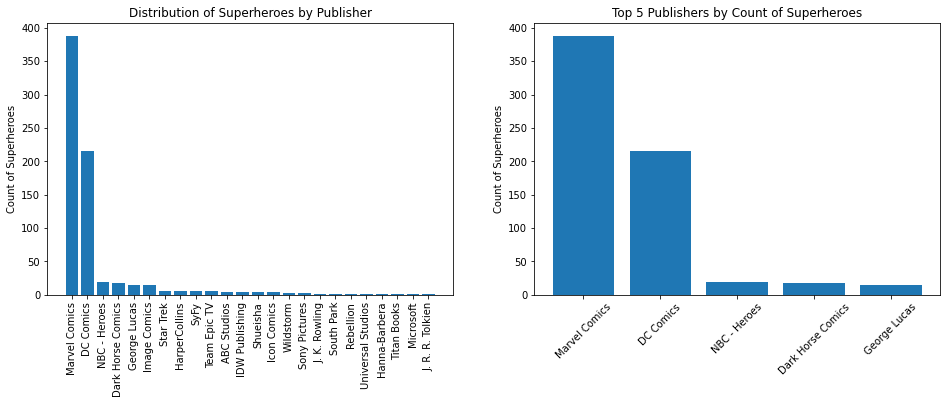

In [175]:
# Run this cell without changes

# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = heroes_df["Publisher"].value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes");

## 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

Recall that the second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

Unlike the previous question, we won't be able to answer this with just `heroes_df`, since information about height is contained in `heroes_df`, while information about superpowers is contained in `powers_df`.

### Joining the Dataframes Together

First, identify the shared key between `heroes_df` and `powers_df`. (Shared key meaning, the values you want to join on.) Let's look at them again:

In [176]:
# Run this cell without changes
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [177]:
powers_df_transposed = powers_df.T
powers_df_transposed

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [178]:
powers_df_transposed = powers_df_transposed.reset_index()
powers_df_transposed

,index,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [179]:
powers_df_transposed = powers_df_transposed.rename(columns = {'index':'name'})
powers_df_transposed

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [180]:
powers_df = powers_df.rename(columns = {'index':'power'})

In [181]:
# Run this cell without changes
powers_df

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,Agent Zero,Air-Walker,Ajax,Alan Scott,Alex Mercer,Alex Woolsly,Alien,Allan Quatermain,Amazo,Ammo,Ando Masahashi,Angel,Angel Dust,Angel Salvadore,Angela,Animal Man,Annihilus,Ant-Man,Ant-Man II,Anti-Monitor,Anti-Spawn,Anti-Venom,Apocalypse,Aquababy,Aqualad,Aquaman,Arachne,Archangel,Arclight,Ardina,Ares,Ariel,Armor,Astro Boy,Atlas,Atom,Atom Girl,Atom II,Atom III,Atom IV,Aurora,Azazel,Azrael,Aztar,Bananaman,Bane,Banshee,Bantam,Batgirl,Batgirl IV,Batgirl VI,Batman,Batman II,Battlestar,Batwoman V,Beak,Beast,Beast Boy,Ben 10,Beta Ray Bill,Beyonder,Big Barda,Big Daddy,Big Man,Bill Harken,Billy Kincaid,Binary,Bionic Woman,Bird-Brain,Bird-Man,Bird-Man II,Birdman,Bishop,Bizarro,Bizarro-Girl,Black Abbott,Black Adam,Black Bolt,Black Canary,Black Cat,Black Flash,Black Knight III,Black Lightning,Black Mamba,Black Manta,Black Panther,Black Vulcan,Black Widow,Blackout,Blackwing,Blackwulf,Blade,Bling!,Blink,Blizzard,Blizzard II,Blob,Bloodaxe,Bloodhawk,Bloodwraith,Blue Beetle,Blue Beetle II,Blue Beetle III,Blue Streak,Boba Fett,Bomb Queen,Boom-Boom,Booster Gold,Box IV,Bradley,Brainiac,Brainiac 5,Brother Voodoo,Brundlefly,Buffy,Bullseye,Bumblebee,Bumbleboy,Bushido,Cable,Callisto,Cameron Hicks,Cannonball,Captain America,Captain Atom,Captain Britain,Captain Cold,Captain Epic,Captain Hindsight,Captain Marvel,Captain Marvel II,Captain Midnight,Captain Planet,Captain Universe,Carnage,Cat,Catwoman,Century,Cerebra,Chamber,Chameleon,Changeling,Cheetah,Cheetah II,Cheetah III,Chromos,Chuck Norris,Citizen Steel,Claire Bennet,Clayface,Cloak,Cogliostro,Colossus,Concrete,Copycat,Cottonmouth,Crimson Crusader,Crimson Dynamo,Crystal,Curse,Cy-Gor,Cyborg,Cyborg Superman,Cyclops,DL Hawkins,Dagger,Daphne Powell,Daredevil,Darkhawk,Darkman,Darkseid,Darkstar,Darth Maul,Darth Vader,Dash,Data,Dazzler,Deadman,Deadpool,Deadshot,Deathlok,Deathstroke,Dementor,Demogoblin,Destroyer,Diamondback,Doc Samson,Doctor Doom,Doctor Doom II,Doctor Fate,Doctor Octopus,Doctor Poison,Doctor Strange,Domino,Donatello,Donna Troy,Doomsday,Doppelganger,Dormammu,Dr Manhattan,Drax the Destroyer,Ego,Elastigirl,Electro,Elektra,Elle Bishop,Elongated Man,Emma Frost,Enchantress,Energy,Ethan Hunt,Etrigan,Evil Deadpool,Evilhawk,Exodus,Fabian Cortez,Falcon,Fallen One II,Faora,Feral,Fighting Spirit,Fin Fang Foom,Fire,Firebird,Firelord,Firestar,Firestorm,Flash,Flash Gordon,Flash II,Flash III,Flash IV,Forge,Franklin Richards,Frenzy,Frigga,Galactus,Gambit,Gamora,Garbage Man,Gary Bell,General Zod,Genesis,Ghost Rider,Ghost Rider II,Giganta,Gladiator,Goblin Queen,Godzilla,Gog,Goku,Goliath IV,Gorilla Grodd,Granny Goodness,Gravity,Greedo,Green Arrow,Green Goblin,Green Goblin II,Green Goblin III,Green Goblin IV,Groot,Guy Gardner,Hal Jordan,Han Solo,Hancock,Harley Quinn,Harry Potter,Havok,Hawk,Hawkeye,Hawkeye II,Hawkgirl,Hawkman,Heat Wave,Hela,Hellboy,Hellcat,Hellgramite,Hellstorm,Hercules,Hiro Nakamura,Hit-Girl,Hobgoblin,Hollow,Hope Summers,Hulk,Human Torch,Huntress,Husk,Hybrid,Hydro-Man,Hyperion,Iceman,Impulse,Indiana Jones,Indigo,Ink,Invisible Woman,Iron Fist,Iron Man,Iron Monger,Isis,JJ Powell,Jack of Hearts,Jack-Jack,James Bond,James T. Kirk,Jar Jar Binks,Jason Bourne,Jean Grey,Jean-Luc Picard,Jennifer Kale,Jessica Cruz,Jessica Jones,Jim Powell,Johann Krauss,John Constantine,John Stewart,John Wraith,Joker,Jolt,Jubilee,Judge Dredd,Juggernaut,Junkpile,Justice,K-2SO,Kang,Karate Kid,Kathryn Janeway,Katniss Everdeen,Kevin 11,Kick-Ass,Kid Flash,Killer Croc,Killer Frost,Kilowog,King Kong,King Shark,Klaw,Kool-Aid Man,Kraven II,Kraven the Hunter,Krypto,Kyle Rayner,Kylo Ren,Lady Bullseye,Lady Deathstrike,Lara Croft,Leader,Leech,Legion,Leonardo,Lex Luthor,Light Lass,Lightning Lad,Lightning Lord,Little Epic,Living Brain,Living Tribunal,Liz Sherman,Lizard,Lobo,Loki,Longshot,Lord Voldemort,Luke Cage,Luke Campbell,Luke Skywalker,Luna,Lyja,MODOK,Mach-IV,Machine Man,Magneto,Magog,Magus,Man of Miracles,Man-Bat,Man-Thing,Man-W

In the cell below, identify the shared key, and your strategy for joining the data (e.g. what will one record represent after you join, will you do a left/right/inner/outer join):

In [ ]:
# Replace None with appropriate text
"""I used an inner join, before I joined though, I had to transpose the second dataframe so it could be merged on the heroes name.
"""

In the cell below, create a new dataframe called `heroes_and_powers_df` that contains the joined data. You can look at the above answer in the solution branch if you're not sure where to start.

***Hint:*** Note that the `.join` method requires that the two dataframes share an index ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)) whereas the `.merge` method can join using any columns ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)). It is up to you which one you want to use.

In [182]:
heroes_and_powers_df = heroes_df.merge(powers_df_transposed, on="name", how="inner")

Run the code below to check your work:

In [183]:
# Run this cell without changes

# Confirms you have created a dataframe with the specified name
assert type(heroes_and_powers_df) == pd.DataFrame

# Confirms you have the right number of rows
assert heroes_and_powers_df.shape[0] == 647

# Confirms you have the necessary columns
# (If you modified the value of powers_df along the way, you might need to
# modify this test. We are checking that all of the powers are present as
# columns.)
assert [power in heroes_and_powers_df.columns for power in powers_df.index]
# (If you modified the value of heroes_df along the way, you mgith need to 
# modify this as well. We are checking that all of the attribute columns from
# heroes_df are present as columns in the joined df)
assert [attribute in heroes_and_powers_df.columns for attribute in heroes_df.columns]

Now that we have created a joined dataframe, we can aggregate the number of superpowers by superhero. This code is written for you:

In [185]:
# Run this cell without changes

# Note: we can use sum() with True and False values and they will
# automatically be cast to 1s and 0s
heroes_and_powers_df["Power Count"] = sum([heroes_and_powers_df[power_name] for power_name in powers_df.index])
heroes_and_powers_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,Fals

### Answering the Question

Now we can plot the height vs. the count of powers:

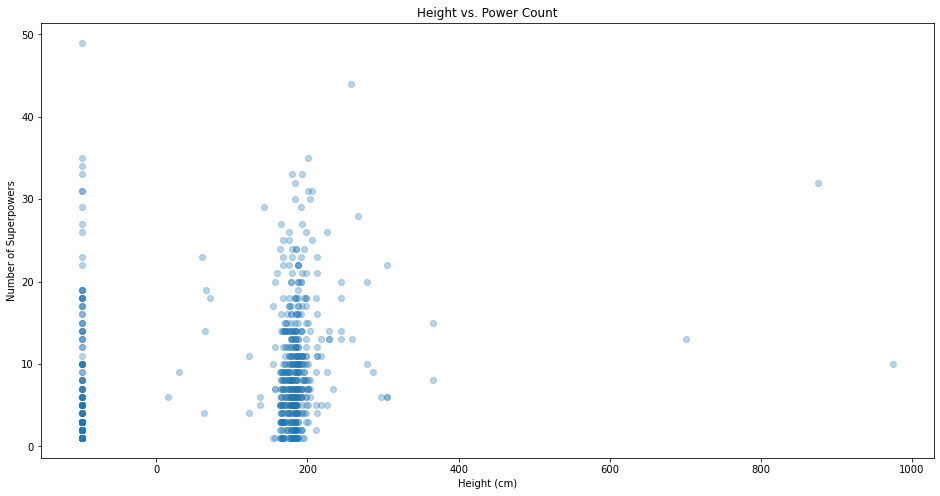

In [186]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=heroes_and_powers_df["Height"],
    y=heroes_and_powers_df["Power Count"],
    alpha=0.3
)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Hmm...what is that stack of values off below zero? What is a "negative" height?

### Identifying and Handling Invalid values

One of the trickier tasks in data cleaning is identifying invalid or impossible values. In these cases, you have to apply your domain knowledge rather than any particular computational technique. For example, if you were looking at data containing dates of past home sales, and one of those dates was 100 years in the future, pandas wouldn't flag that as an issue, but you as a data scientist should be able to identify it.

In this case, we are looking at heights, which are 1-dimensional, positive numbers. In theory we could have a very tiny height close to 0 cm because the hero is microscopic, but it does not make sense that we would have a height below zero.

Let's take a look at a sample of those negative heights:

In [187]:
# Run this cell without changes
heroes_and_powers_df[heroes_and_powers_df["Height"] < 0].sample(5, random_state=1)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
150,Chameleon,Male,-,-,-,-99.0,DC Comics,-,bad,-99.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
163,Crimson Crusader,Male,blue,-,Strawberry Blond,-99.0,Marvel Comics,-,good,-99.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

It looks like not only are those heights negative, those weights are negative also, and all of them are set to exactly -99.0.

It seems like this data source probably filled in -99.0 as the height or weight whenever it was unknown, instead of just leaving it as NaN.

Depending on the purpose of the analysis, maybe this would be a useful piece of information, but for our current question, let's go ahead and drop the records where the height is -99.0. We'll make a new temporary dataframe to make sure we don't accidentally delete anything that will be needed in a future question.

In [188]:
# Run this cell without changes
question_2_df = heroes_and_powers_df[heroes_and_powers_df["Height"] != -99.0].copy()
question_2_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,Fals

### Answering the Question, Again

Now we can redo that plot without those negative heights:

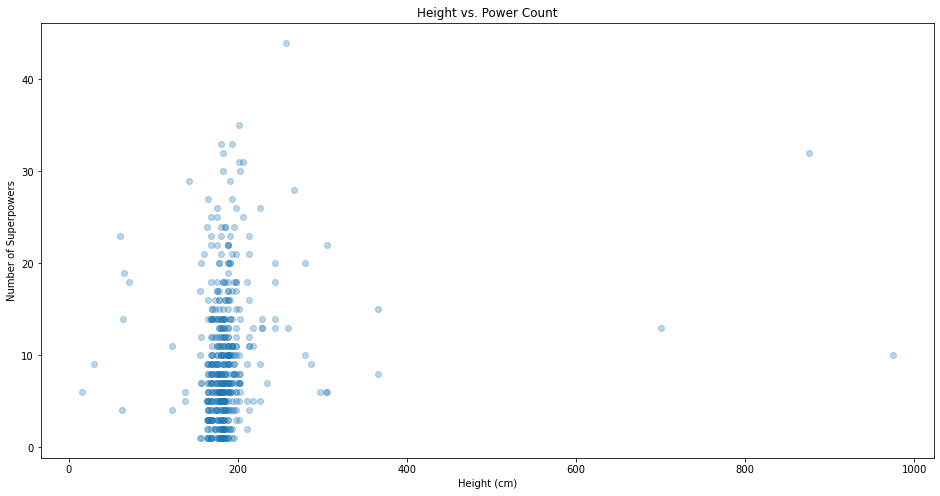

In [189]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=question_2_df["Height"],
    y=question_2_df["Power Count"],
    alpha=0.3
)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Ok, that makes more sense. It looks like there is not much of a relationship between height and number of superpowers.

Now we can go on to answering the second half of question 2: *And does this differ based on gender?*

To indicate multiple categories within a scatter plot, we can use color to add a third dimension:

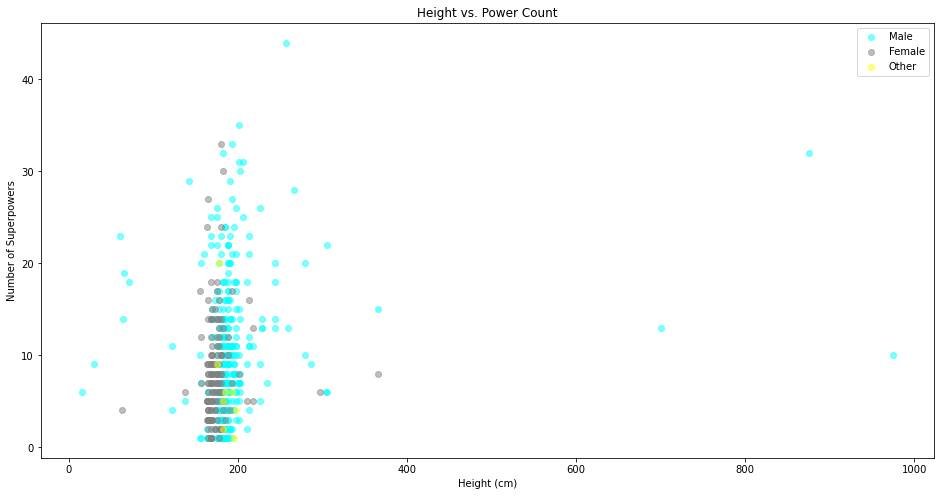

In [190]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

# Select subsets
question_2_male = question_2_df[question_2_df["Gender"] == "Male"]
question_2_female = question_2_df[question_2_df["Gender"] == "Female"]
question_2_other = question_2_df[(question_2_df["Gender"] != "Male") & (question_2_df["Gender"] != "Female")]

# Plot data with different colors
ax.scatter(
    x=question_2_male["Height"],
    y=question_2_male["Power Count"],
    alpha=0.5,
    color="cyan",
    label="Male"
)
ax.scatter(
    x=question_2_female["Height"],
    y=question_2_female["Power Count"],
    alpha=0.5,
    color="gray",
    label="Female"
)
ax.scatter(
    x=question_2_other["Height"],
    y=question_2_other["Power Count"],
    alpha=0.5,
    color="yellow",
    label="Other"
)

# Customize appearance
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count")
ax.legend();

It appears that there is still no clear relationship between count of powers and height, regardless of gender. We do however note that "Male" is the most common gender, and that male superheroes tend to be taller, on average.

## 4. Perform Data Aggregation Required to Answer Third Question

Recall that the third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

We'll need to keep using `heroes_and_powers_df` since we require information from both `heroes_df` and `powers_df`.

Your resulting `question_3_df` should contain aggregated data, with columns `Superpower Name`, `Marvel Comics` (containing the count of occurrences in Marvel Comics), and `DC Comics` (containing the count of occurrences in DC Comics). Each row should represent a superpower.

In other words, `question_3_df` should look like this:

![question 3 df](images/question_3.png)

Don't worry if the rows or columns are in a different order, all that matters is that you have the right rows and columns with all the data.

***Hint:*** refer to the [documentation for `.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and treat each publisher as a group.

In [191]:
pd.set_option('display.max_columns', None)


In [192]:
heroes_and_powers_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,Fals

The code below checks that you have the correct dataframe structure:

In [193]:
heroes_and_powers_df['Radar Sense'].value_counts()

False    641
True       6
Name: Radar Sense, dtype: int64

In [205]:
question_3_df2 = heroes_and_powers_df.drop(heroes_and_powers_df[['Power Count', 'name', 'Gender', 'Eye color', 'Race', 'Hair color','Height', 'Skin color', 'Alignment', 'Weight']], axis=1)
question_3_df2

,Publisher,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,Marvel Comics,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Dark Horse Comics,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True

In [208]:
question_3_df3 = question_3_df2.melt(id_vars = ['Publisher'])
question_3_df3

,Publisher,variable,value
0,Marvel Comics,Agility,False
1,Dark Horse Comics,Agility,True
2,DC Comics,Agility,False
3,Marvel Comics,Agility,False
4,Marvel Comics,Agility,False
...,...,...,...
108044,Marvel Comics,Omniscient,False
108045,Marvel Comics,Omniscient,False
108046,George Lucas,Omniscient,False
108047,DC Comics,Omniscient,False


In [211]:
question_3_df4 = question_3_df3[question_3_df3['value']== True]
question_3_df4

,Publisher,variable,value
1,Dark Horse Comics,Agility,True
11,Marvel Comics,Agility,True
13,Wildstorm,Agility,True
15,Dark Horse Comics,Agility,True
17,DC Comics,Agility,True
...,...,...,...
106192,DC Comics,Vision - Cryo,True
107126,Image Comics,Omnipresent,True
107196,Marvel Comics,Omnipresent,True
107773,Image Comics,Omniscient,True


In [214]:
question_3_df_5 = question_3_df4[(question_3_df4['Publisher'] == 'Marvel Comics') | (question_3_df4['Publisher'] == 'DC Comics')]
question_3_df_5

,Publisher,variable,value
11,Marvel Comics,Agility,True
17,DC Comics,Agility,True
20,Marvel Comics,Agility,True
22,Marvel Comics,Agility,True
26,Marvel Comics,Agility,True
...,...,...,...
105267,Marvel Comics,Phoenix Force,True
105665,DC Comics,Molecular Dissipation,True
106192,DC Comics,Vision - Cryo,True
107196,Marvel Comics,Omnipresent,True


In [217]:
question_3_df_6 = question_3_df_5.iloc[:,[0,1]]
question_3_df_6

,Publisher,variable
11,Marvel Comics,Agility
17,DC Comics,Agility
20,Marvel Comics,Agility
22,Marvel Comics,Agility
26,Marvel Comics,Agility
...,...,...
105267,Marvel Comics,Phoenix Force
105665,DC Comics,Molecular Dissipation
106192,DC Comics,Vision - Cryo
107196,Marvel Comics,Omnipresent


In [222]:
question7 = pd.DataFrame(question_3_df_6.groupby('variable')['Publisher'].value_counts()).rename(columns = {'Publisher':'Counts'}).reset_index()
question7

,variable,Publisher,Counts
0,Accelerated Healing,Marvel Comics,100
1,Accelerated Healing,DC Comics,51
2,Adaptation,DC Comics,1
3,Adaptation,Marvel Comics,1
4,Agility,Marvel Comics,126
...,...,...,...
287,Weather Control,Marvel Comics,3
288,Weather Control,DC Comics,2
289,Web Creation,Marvel Comics,16
290,Wind Control,Marvel Comics,2


In [229]:
res = question7.pivot(index='variable', columns='Publisher', values='Counts')
res

Publisher,DC Comics,Marvel Comics
variable,,
Accelerated Healing,51.0,100.0
Adaptation,1.0,1.0
Agility,71.0,126.0
Animal Attributes,8.0,17.0
Animal Control,4.0,4.0
...,...,...
Weapon-based Powers,20.0,34.0
Weapons Master,40.0,36.0
Weather Control,2.0,3.0


In [232]:
res2=res.reset_index().rename(columns = {'variable':'Superpower Name'})
res2

Publisher,Superpower Name,DC Comics,Marvel Comics
0,Accelerated Healing,51.0,100.0
1,Adaptation,1.0,1.0
2,Agility,71.0,126.0
3,Animal Attributes,8.0,17.0
4,Animal Control,4.0,4.0
...,...,...,...
155,Weapon-based Powers,20.0,34.0
156,Weapons Master,40.0,36.0
157,Weather Control,2.0,3.0
158,Web Creation,NaN,16.0


In [233]:
# Run this cell without changes

# Checking that you made a dataframe called question_3_df
assert type(res2) == pd.DataFrame

# Checking the shape
assert res2.shape == (167, 3)

# Checking the column names
assert sorted(list(res2.columns)) == ['DC Comics', 'Marvel Comics', 'Superpower Name']

AssertionError: 

### Answering the Question

The code below uses the dataframe you created to find and plot the most common superpowers in Marvel Comics and DC Comics.

In [239]:
# Run this cell without changes

marvel_most_common = res2.drop("DC Comics", axis=1)
marvel_most_common = marvel_most_common.sort_values(by="Marvel Comics", ascending=False)[:5]
marvel_most_common

Publisher,Superpower Name,Marvel Comics
131,Super Strength,204.0
26,Durability,154.0
124,Stamina,150.0
130,Super Speed,137.0
2,Agility,126.0


In [244]:
# Run this cell without changes

dc_most_common = res2.drop("Marvel Comics", axis=1)
dc_most_common = dc_most_common.sort_values(by="DC Comics", ascending=False)[:5]
dc_most_common

Publisher,Superpower Name,DC Comics
131,Super Strength,109.0
124,Stamina,90.0
49,Flight,86.0
130,Super Speed,79.0
2,Agility,71.0


In [247]:
marvel_most_common = res2.drop("DC Comics", axis=1)
marvel_most_common = marvel_most_common.sort_values(by="Marvel Comics", ascending=False)[:5]
marvel_most_common

Publisher,Superpower Name,Marvel Comics
131,Super Strength,204.0
26,Durability,154.0
124,Stamina,150.0
130,Super Speed,137.0
2,Agility,126.0


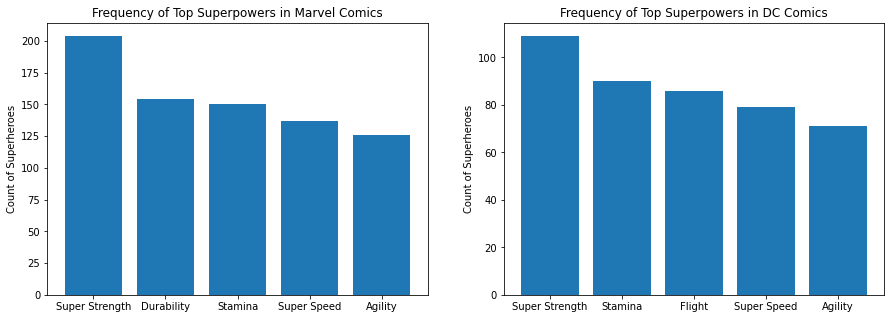

In [248]:
# Run this cell without changes

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.bar(
    x=marvel_most_common["Superpower Name"],
    height=marvel_most_common["Marvel Comics"]
)
ax2.bar(
    x=dc_most_common["Superpower Name"],
    height=dc_most_common["DC Comics"]
)

ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Frequency of Top Superpowers in Marvel Comics")
ax2.set_title("Frequency of Top Superpowers in DC Comics");

It looks like super strength is the most popular power in both Marvel Comics and DC Comics. Overall, the top 5 powers are fairly similar — 4 out of 5 overlap, although Marvel contains agility whereas DC contains flight.

## 5. Formulate and Answer Your Own Question

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight)?
* What is the distribution of skin colors amongst alien heroes?
* How are eye color and hair color related in this dataset?

Explain your question below:

In [ ]:
# Replace None with appropriate text:
"""
None
"""

Some sample cells have been provided to give you room to work. Feel free to create more cells as needed.

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

(There is no solution branch for this part, and feel free to move on to the next lesson if you have already spent more than 90 minutes.)

In [155]:
import pandas.Series.corr as pandas.Series

SyntaxError: invalid syntax (<ipython-input-155-88fbbcc53878>, line 1)

In [152]:
column_1 = heroes_and_powers_df["Eye color"]
column_2 = heroes_and_powers_df["Hair color"]
correlation = column_1.corr(column_2)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## Summary

In this lab, you demonstrated your mastery of using pandas to clean and aggregate data in order to answer several business questions. This included identifying and handling missing values, text requiring preprocessing, and invalid values. You also performed aggregation and reshaping tasks such as transposing, joining, and grouping data. Great job, there was a lot here!